In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

_Analyse microstructure des mouvements de prix du Nasdaq100 \- Version 1_   



In [4]:
J = pd.read_excel('6FDJUIN.xlsx')
J['time'] = pd.to_datetime(J['time'], format='%H:%M:%S').dt.time
J['time_str'] = J['time'].astype(str) # Convertir time en chaînes de caractères
J.head()

,time,open1,high1,low1,close1,volume1,open2,high2,low2,close2,...,high6,low6,close6,volume6,open7,high7,low7,close7,volume7,time_str
0,09:30:00,18712.75,18721.00,18701.00,18705.25,5083,18637.75,18650.75,18627.75,18632.75,...,18995.25,18980.75,18989.00,4413,19058.00,19066.25,19053.25,19061.00,5018,09:30:00
1,09:31:00,18705.00,18713.25,18698.50,18708.75,4240,18632.25,18638.00,18619.25,18630.00,...,18992.50,18977.75,18989.00,3803,19061.25,19066.25,19046.25,19048.25,4991,09:31:00
2,09:32:00,18708.25,18731.25,18703.25,18713.00,4743,18629.50,18631.50,18622.50,18629.75,...,19007.00,18982.75,19006.00,4480,19048.50,19068.00,19047.75,19060.50,4455,09:32:00
3,09:33:00,18713.75,18723.50,18710.50,18716.75,2305,18629.50,18634.75,18613.25,18613.75,...,19006.75,18992.50,19004.25,2883,19060.75,19076.00,19057.75,19075.00,3570,09:33:00
4,09:34:00,18717.00,18724.25,18714.50,18718.75,2195,18613.50,18615.75,18586.75,18594.75,...,19017.00,18998.75,19012.75,3129,19074.75,19084.25,19074.75,19076.75,3910,09:34:00


Petit rappel : 

- Close1 : correspond au prix de clôture pour la journée du 03/06 \(lundi\)
- Close2 : correspond au prix de clôture pour la journée du 04/06 \(mardi\)
- Close3 : correspond au prix de clôture pour la journée du 05/06 \(mercredi\)
- Close4 : correspond au prix de clôture pour la journée du 06/06 \(jeudi\)
- Close5 : correspond au prix de clôture pour la journée du 07/06 \(vendredi\)  
- Close6 : correspond au prix de clôture pour la journée du 10/06 \(lundi\)
- Close7 : correspond au prix de clôture pour la journée du 11/06 \(mardi\)



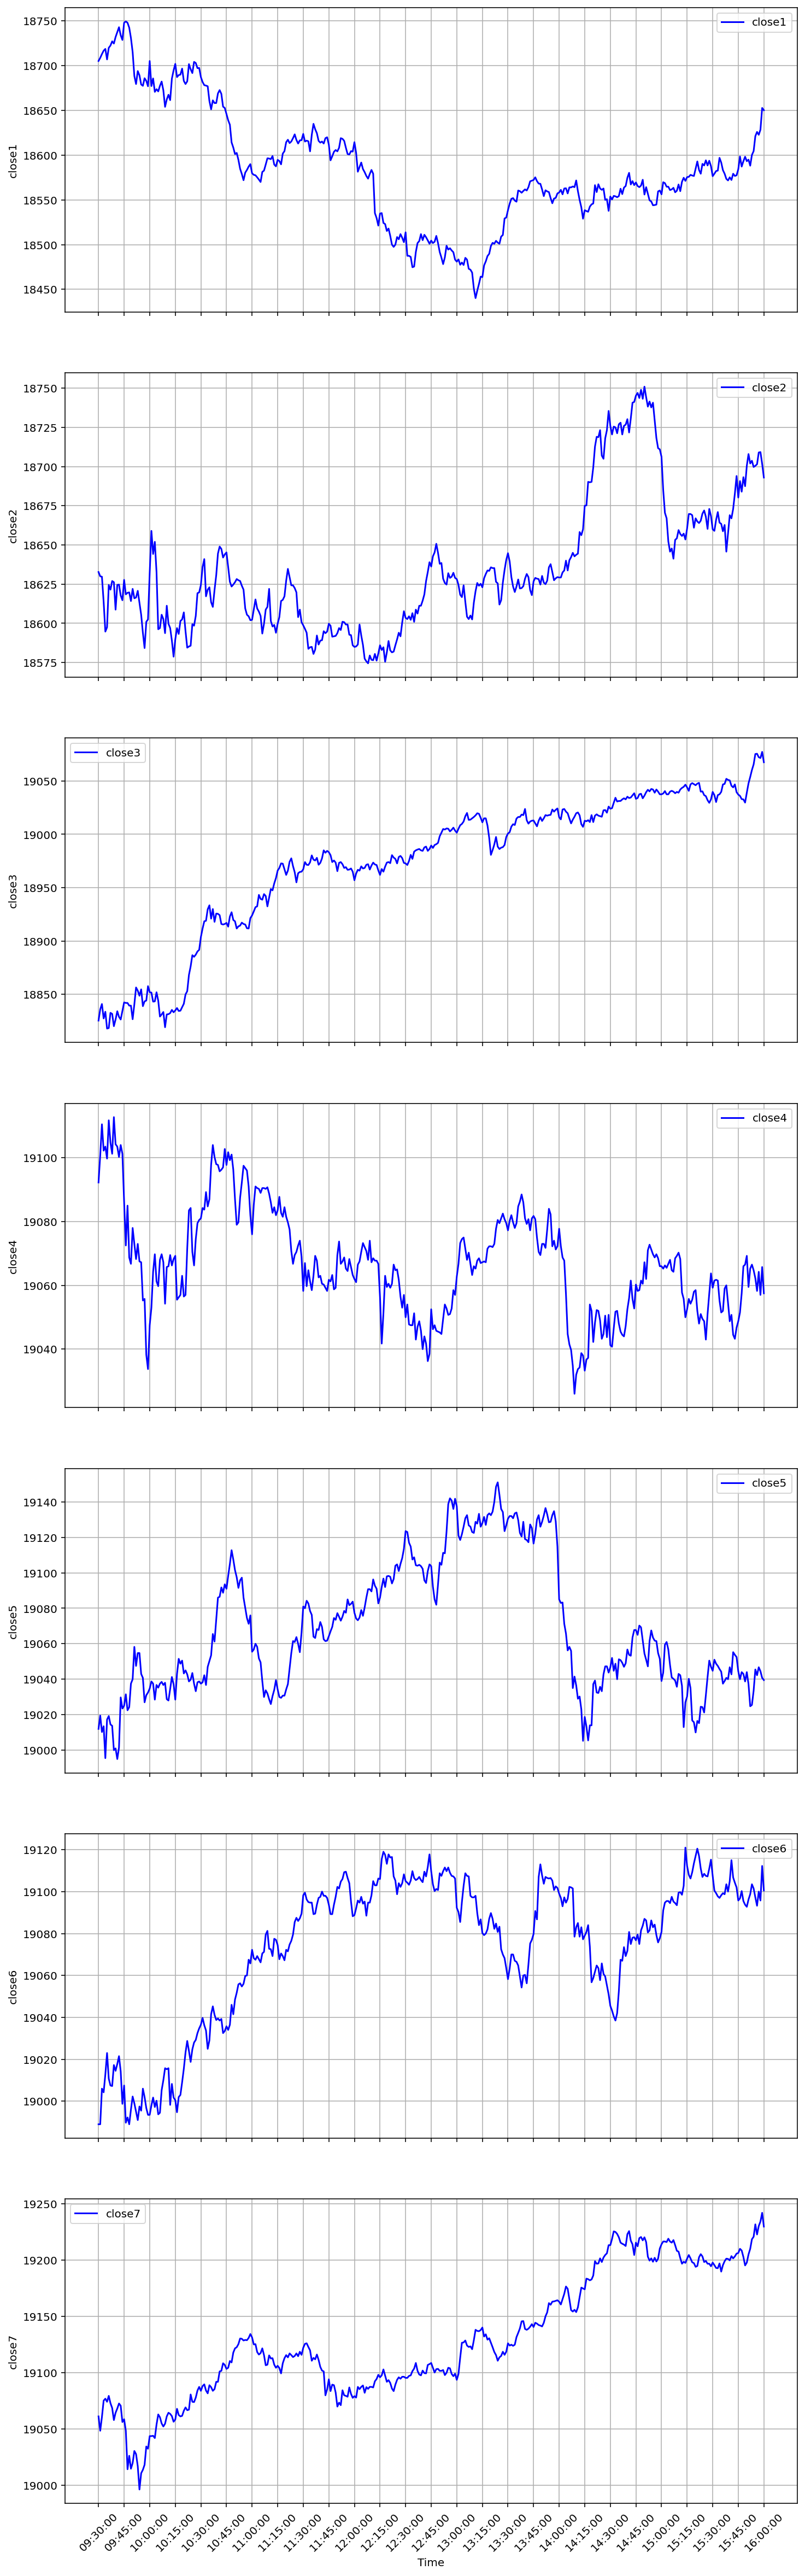

In [5]:
# Plot

close_columns = [col for col in J.columns if 'close' in col]

time_labels = J['time_str'][::15]

# Plot each 'close' column over time with improved x-axis labeling
fig, axes = plt.subplots(len(close_columns), 1, figsize=(12, 6 * len(close_columns)), sharex=True)

for ax, col in zip(axes, close_columns):
    ax.plot(J['time_str'], J[col], label=col, color = 'blue')
    ax.set_ylabel(col)
    ax.legend()
    ax.grid(True)
    ax.set_xticks(time_labels.index)
    ax.set_xticklabels(time_labels)

# Set x-axis label for the last subplot
axes[-1].set_xlabel('Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [6]:
# Statistiques descriptives 

# Initialize a dictionary to store descriptive statistics for each 'close' column
descriptive_stats = {}

# Loop through each 'close' column and calculate descriptive statistics
for col in close_columns:
    descriptive_stats[col] = J[col].describe()

# Convert the dictionary to a DataFrame for better visualization
descriptive_stats_df = pd.DataFrame(descriptive_stats)
print(descriptive_stats_df)

             close1        close2        close3        close4        close5  \
count    391.000000    391.000000    391.000000    391.000000    391.000000   
mean   18585.416240  18635.742967  18973.668798  19066.981458  19068.663043   
std       66.501891     42.701409     66.825147     16.573974     37.498296   
min    18440.250000  18574.500000  18818.000000  19026.000000  18995.000000   
25%    18550.000000  18602.750000  18941.375000  19055.750000  19039.000000   
50%    18576.750000  18626.250000  18986.250000  19066.750000  19060.000000   
75%    18616.625000  18657.250000  19022.875000  19077.625000  19097.625000   
max    18749.500000  18751.000000  19077.250000  19112.750000  19151.000000   

             close6        close7  
count    391.000000    391.000000  
mean   19074.303069  19130.001918  
std       35.192314     55.421122  
min    18989.000000  18996.000000  
25%    19058.000000  19089.250000  
50%    19086.000000  19117.250000  
75%    19101.375000  19192.875000  


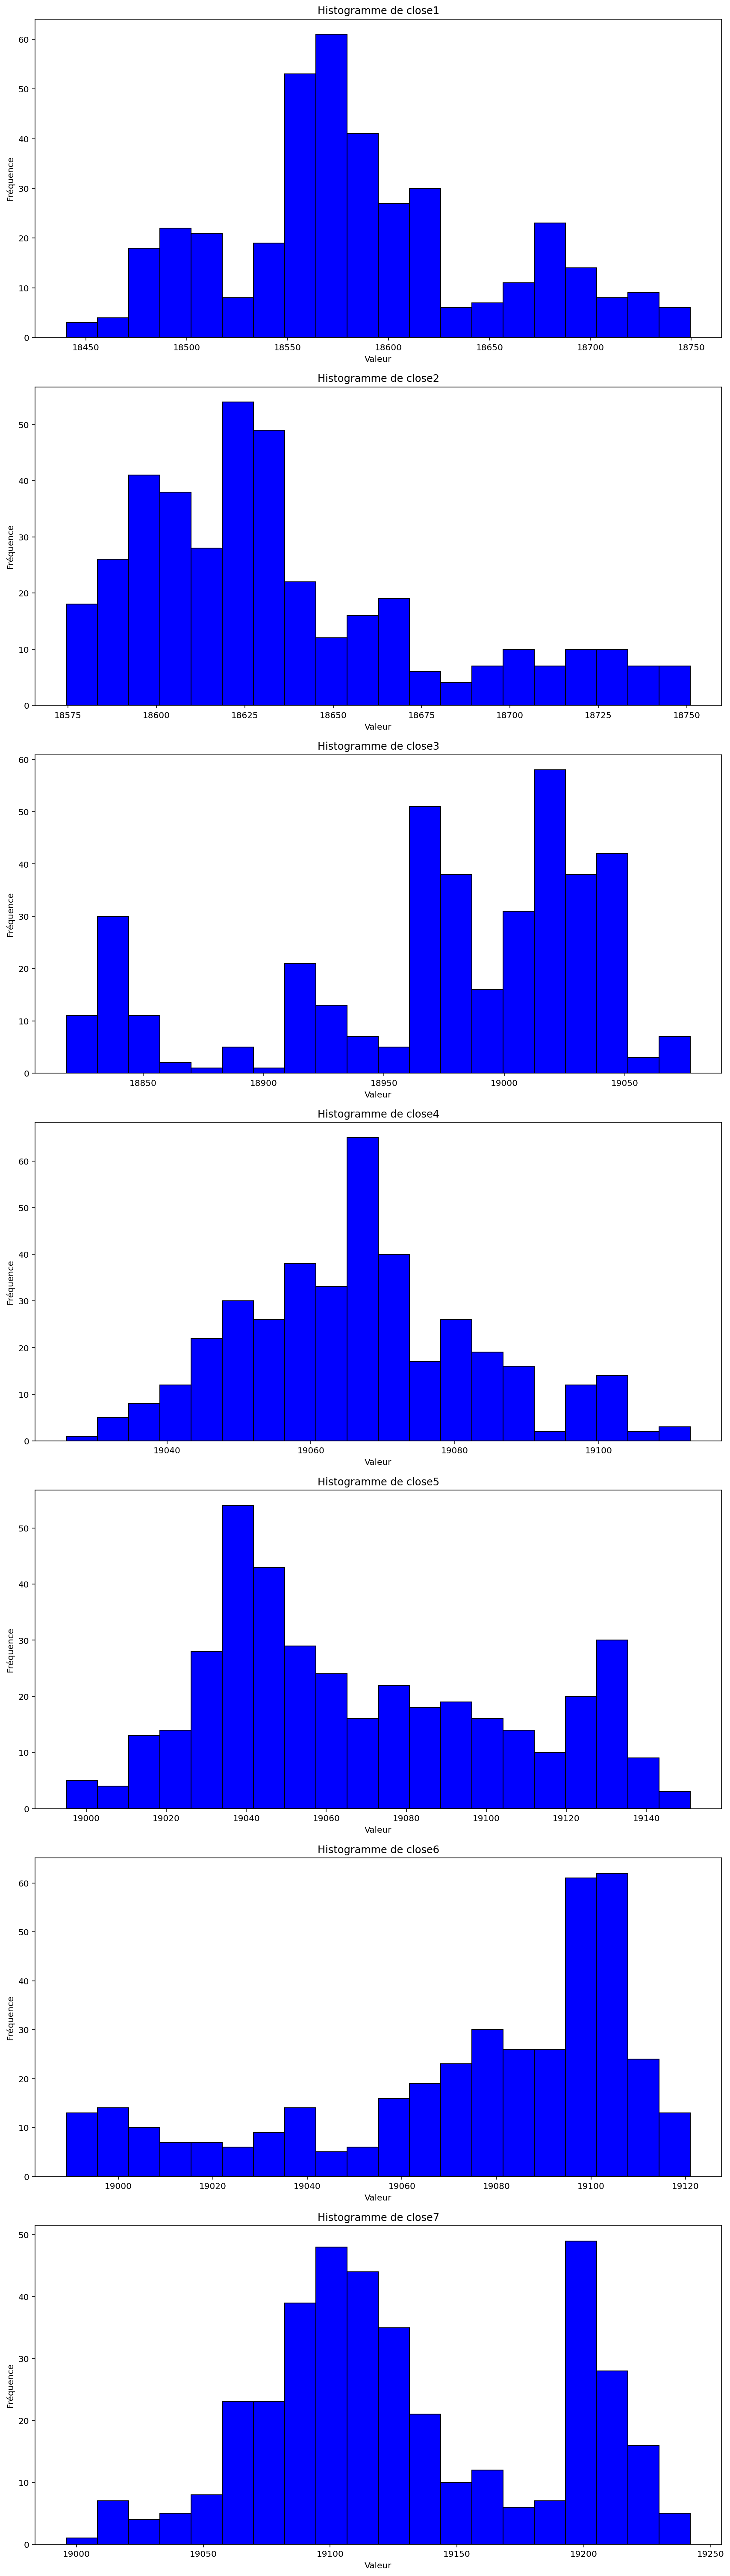

In [7]:
# Histogramme 

fig, axes = plt.subplots(len(close_columns), 1, figsize=(12, 6 * len(close_columns)))

for ax, col in zip(axes, close_columns):
    ax.hist(J[col], bins=20, color='blue', edgecolor='black')
    ax.set_title(f'Histogramme de {col}')
    ax.set_xlabel('Valeur')
    ax.set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

In [11]:
# Filtrer les données entre 9:30 et 10:00 - Open Market
start_time = pd.to_datetime('09:30:00', format='%H:%M:%S').time()
end_time = pd.to_datetime('10:00:00', format='%H:%M:%S').time()

filtered_data = J[(J['time'] >= start_time) & (J['time'] <= end_time)]

# Définir les colonnes 'close' retenu pour l'analyse
close_columns = [col for col in J.columns if 'close' in col]

# Calcule des statistiques descriptives pour les données filtrées
for col in close_columns:
    stats = filtered_data[col].describe()
    print(f"Statistiques descriptives pour {col} de 9:30 à 10:00:")
    print(stats)
    print("\n")

Statistiques descriptives pour close1 de 9:30 à 10:00:
count       31.000000
mean     18713.951613
std         23.233813
min      18677.000000
25%      18691.625000
50%      18716.750000
75%      18731.500000
max      18749.500000
Name: close1, dtype: float64


Statistiques descriptives pour close2 de 9:30 à 10:00:
count       31.000000
mean     18615.991935
std         12.266738
min      18584.250000
25%      18610.875000
50%      18618.500000
75%      18624.625000
max      18632.750000
Name: close2, dtype: float64


Statistiques descriptives pour close3 de 9:30 à 10:00:
count       31.000000
mean     18837.379032
std         11.023057
min      18818.000000
25%      18828.250000
50%      18839.000000
75%      18843.000000
max      18857.750000
Name: close3, dtype: float64


Statistiques descriptives pour close4 de 9:30 à 10:00:
count       31.000000
mean     19083.532258
std         22.660147
min      19033.750000
25%      19067.875000
50%      19086.250000
75%      19102.875000
max  

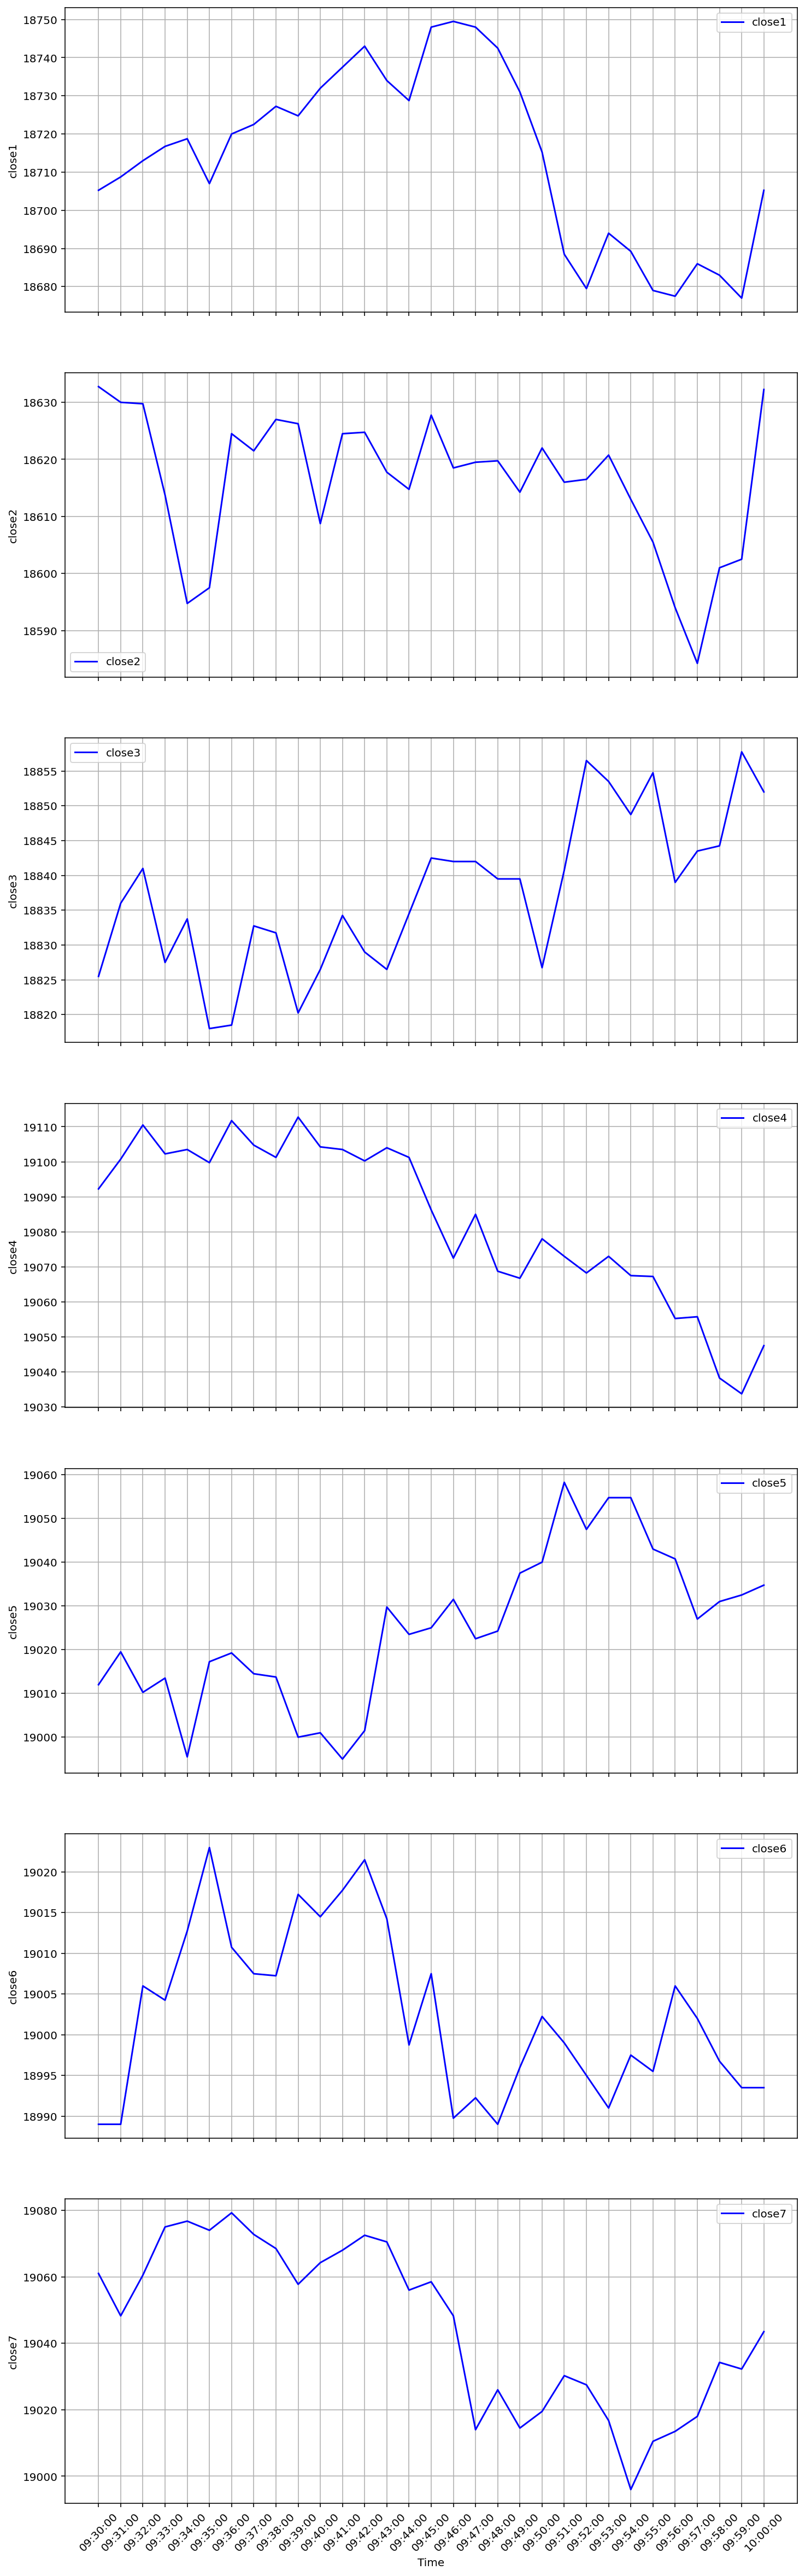

In [12]:
# Plot 

# Plot Close pour les 30 premières minutes
fig, axes = plt.subplots(len(close_columns), 1, figsize=(12, 6 * len(close_columns)), sharex=True)

for ax, col in zip(axes, close_columns):
    ax.plot(filtered_data['time'].astype(str), filtered_data[col], label=col, color='blue')
    ax.set_ylabel(col)
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel('Time')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Même analyse pour les 30 dernières minutes du marchés 

# Filtrer les données entre 15:30 et 16:00
start_time = pd.to_datetime('15:30:00', format='%H:%M:%S').time()
end_time = pd.to_datetime('16:00:00', format='%H:%M:%S').time()

filtered_data = J[(J['time'] >= start_time) & (J['time'] <= end_time)]

In [14]:
# Statistiques descriptives 

# Définir les colonnes 'close'
close_columns = [col for col in J.columns if 'close' in col]

# Calculer les statistiques descriptives pour les données filtrées
for col in close_columns:
    stats = filtered_data[col].describe()
    print(f"Statistiques descriptives pour {col} de 15:30 à 16:00:")
    print(stats)
    print("\n")

Statistiques descriptives pour close1 de 15:30 à 16:00:
count       31.000000
mean     18594.919355
std         21.908273
min      18571.750000
25%      18579.250000
50%      18588.250000
75%      18599.375000
max      18652.750000
Name: close1, dtype: float64


Statistiques descriptives pour close2 de 15:30 à 16:00:
count       31.000000
mean     18682.540323
std         18.839243
min      18645.750000
25%      18665.125000
50%      18684.000000
75%      18700.500000
max      18709.250000
Name: close2, dtype: float64


Statistiques descriptives pour close3 de 15:30 à 16:00:
count       31.000000
mean     19048.975806
std         14.617392
min      19029.750000
25%      19037.375000
50%      19046.750000
75%      19057.000000
max      19077.250000
Name: close3, dtype: float64


Statistiques descriptives pour close4 de 15:30 à 16:00:
count       31.000000
mean     19057.766129
std          7.042708
min      19043.250000
25%      19051.750000
50%      19059.000000
75%      19063.250000
m

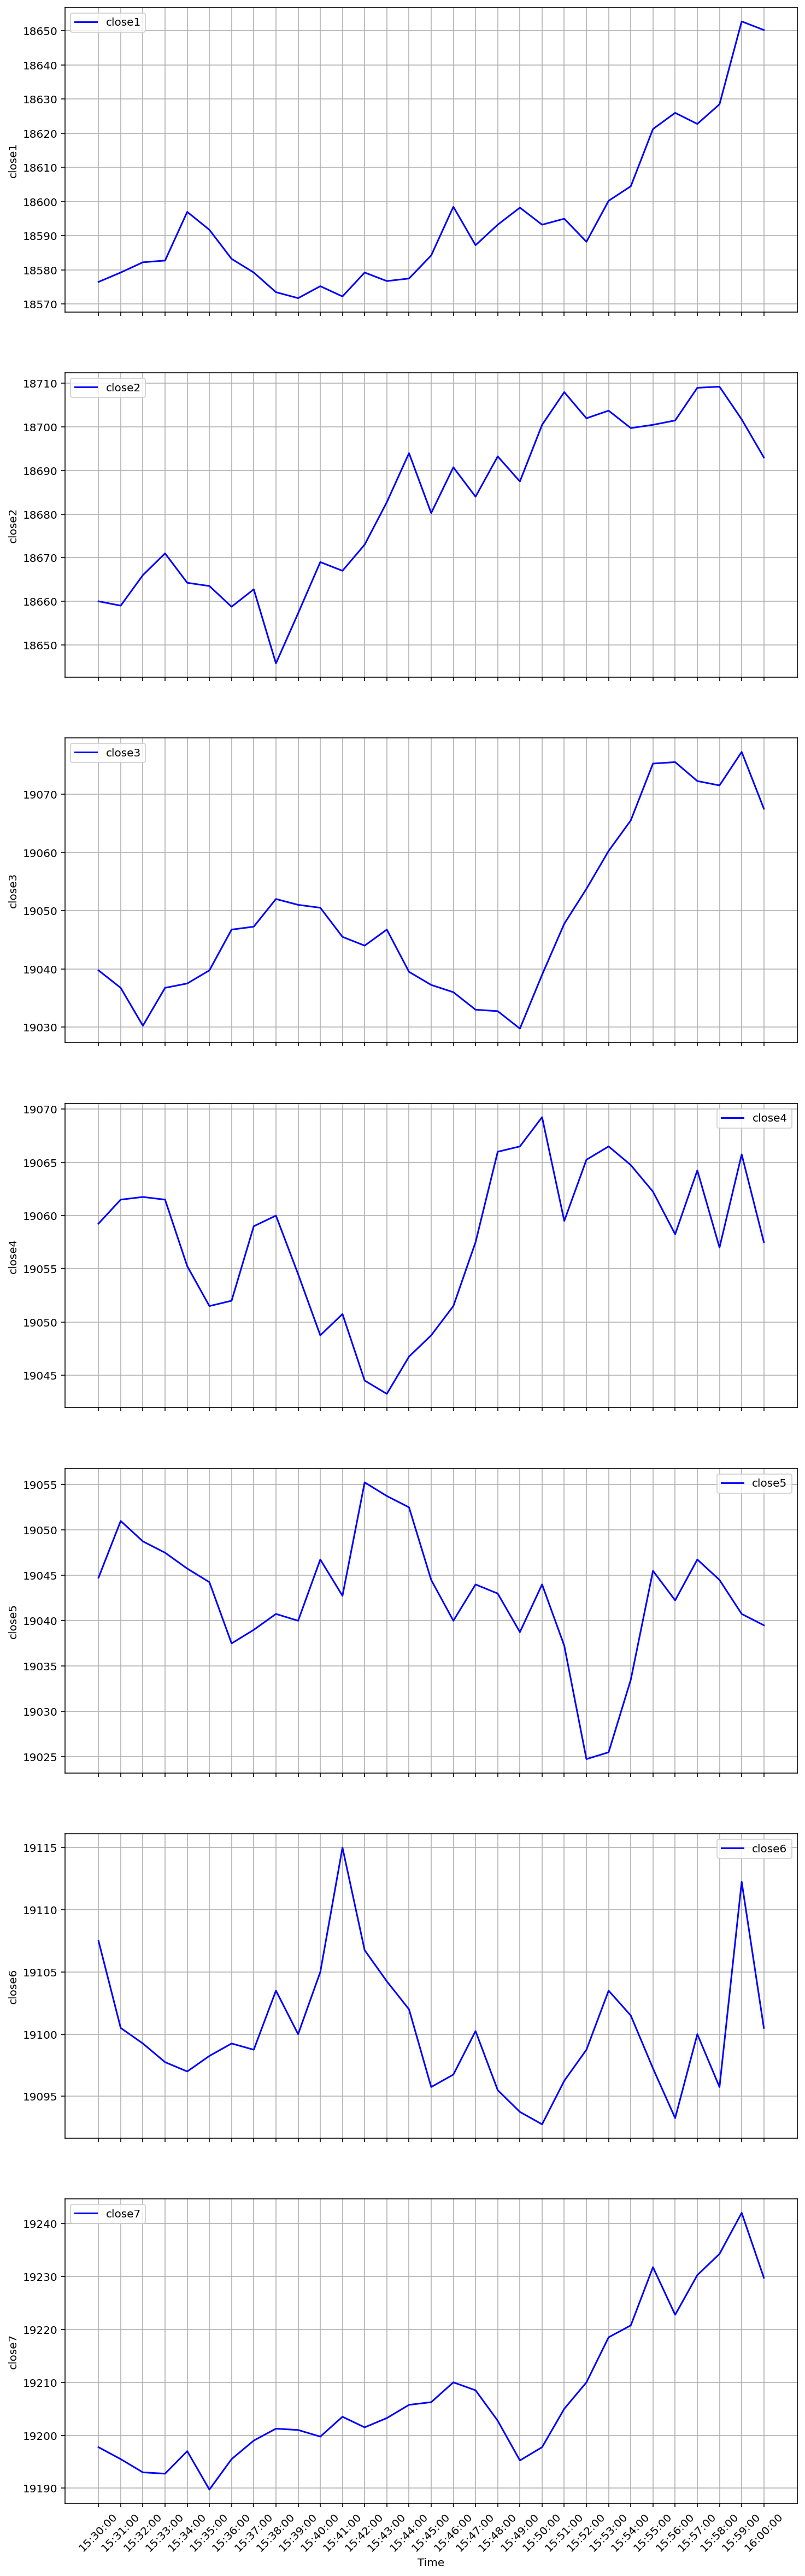

In [15]:
fig, axes = plt.subplots(len(close_columns), 1, figsize=(12, 6 * len(close_columns)), sharex=True)

for ax, col in zip(axes, close_columns):
    ax.plot(filtered_data['time'].astype(str), filtered_data[col], label=col, color='blue')
    ax.set_ylabel(col)
    ax.legend()
    ax.grid(True)


axes[-1].set_xlabel('Time')
plt.xticks(rotation=45)
plt.show()

<u>**Notre analyse s'arrête ici, avec les recommandations suivantes :** </u>

- Explorer d'autres patterns \(au sein d'autres variables que 'close i' pour tout i ∈ \[1, 7\]\)

- Etudier l'existence d'une relation statistique entres les 30 premières minutes du marchés et les 30 dernières minutes. 

- Augmenter la période d'étude afin de détecter des schémas de récurrences

- Réaliser du feature engineering pour détecter de nouvelles relations \(exemple: faire un ratio entre le high/low et étudier le comportement dynamique au cours de T\)

**Une fois que ces étapes seront réalisées, il faudra passer à l'étape d'élaboration de stratégies de trading basée sur les découvertes précédentes.**  

